In [1]:
import pandas as pd

# Load the datasets
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

# Display the first few rows of each dataframe
print("First few rows of calories.csv:")
print(calories.head())
print("\nFirst few rows of exercise.csv:")
print(exercise.head())

# Get information about the dataframes
print("\nInformation about calories.csv:")
print(calories.info())
print("\nInformation about exercise.csv:")
print(exercise.info())

First few rows of calories.csv:
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

First few rows of exercise.csv:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

Information about calories.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None

Info

calories.csv:

Contains User_ID (integer) and Calories (float).
No missing values.
Total of 15,000 entries.

exercise.csv:

Contains User_ID (integer), Gender (object), Age (integer), Height (float), Weight (float), Duration (float), Heart_Rate (float), and Body_Temp (float).
No missing values.
Total of 15,000 entries.
It looks like both datasets have the same number of entries and a common User_ID, which is excellent for merging.

In [2]:
# Merge the two dataframes based on 'User_ID'
merged_df = pd.merge(exercise, calories, on='User_ID', how='inner')

# Display the first few rows of the merged dataframe
print("First few rows of the merged dataframe:")
print(merged_df.head())

# Get information about the merged dataframe
print("\nInformation about the merged dataframe:")
print(merged_df.info())

First few rows of the merged dataframe:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  

Information about the merged dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      1

In [3]:
# Get descriptive statistics of the numerical columns
print(merged_df.describe())

            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     

### Initial Exploratory Data Analysis (EDA) - Descriptive Statistics

We used the `describe()` method to get a statistical summary of the numerical features in our merged dataset. Here are some initial observations:

* **User_ID:** This is a unique identifier, and the statistics here mainly show the range of IDs.
* **Age:** The ages of the participants range from 20 to 79 years, with an average age of approximately 42.8 years. The distribution seems reasonably spread out.
* **Height:** The height varies from 123.0 cm to 222.0 cm, with an average height of about 174.5 cm. The minimum height of 123 cm might be worth a closer look later to see if it's a potential outlier.
* **Weight:** The weight ranges from 36.0 kg to 132.0 kg, with an average weight of around 75.0 kg. This also seems like a plausible range for our dataset.
* **Duration:** The duration of exercise sessions ranges from just 1 minute to 30 minutes, with an average duration of about 15.5 minutes. This suggests that the exercise sessions in this dataset might be relatively short on average.
* **Heart_Rate:** The heart rate during exercise varies from 67.0 to 128.0 beats per minute, with an average of approximately 95.5 bpm. This range seems within the expected physiological limits for exercise.
* **Body_Temp:** The body temperature during exercise ranges from 37.1 degrees Celsius to 41.5 degrees Celsius, with an average of about 40.0 degrees Celsius. The upper end of this range might indicate very intense exercise or potentially some outliers.
* **Calories:** The number of calories burned ranges from a minimum of 1.0 to a maximum of 314.0, with an average of about 89.5 calories. A minimum of 1 calorie burned seems unusually low and might be an outlier.

These initial statistics provide a good overview of our numerical data. In the next steps, we can further explore the distributions of these features and the relationships between them.

C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

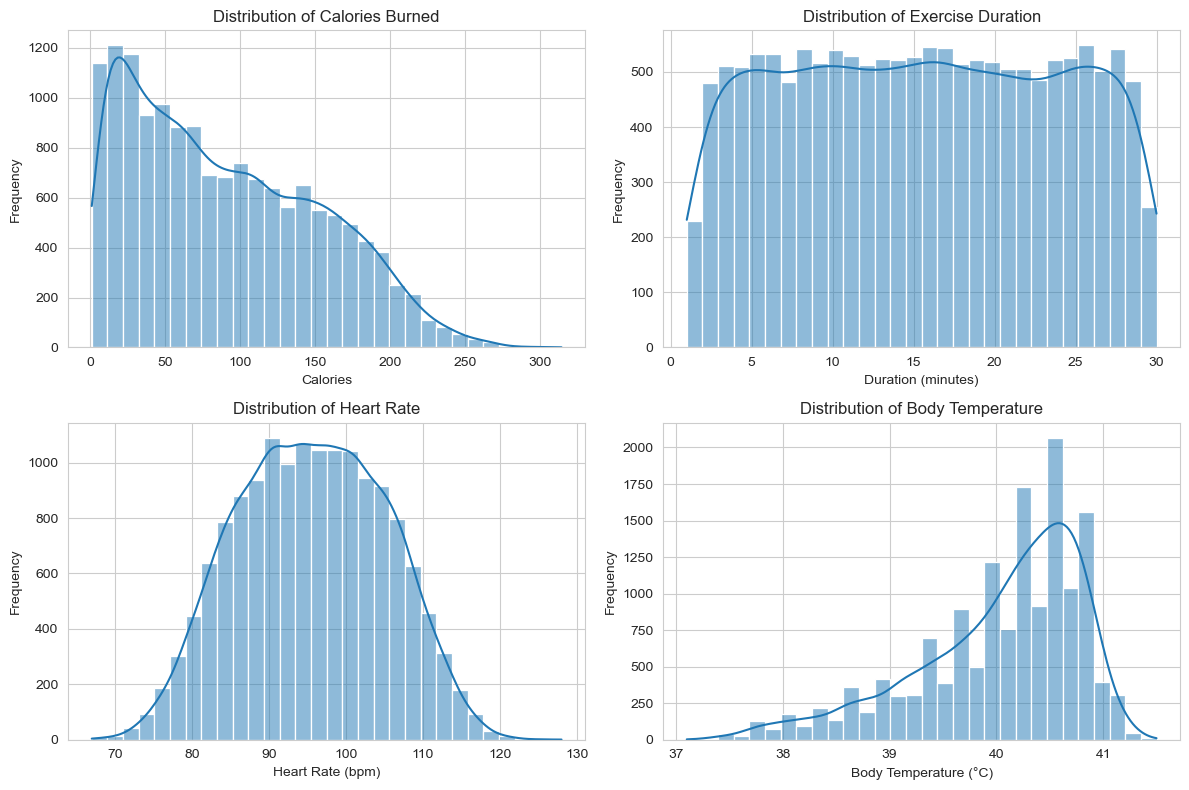

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets again (to be safe in this environment)
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

# Merge the two dataframes based on 'User_ID'
merged_df = pd.merge(exercise, calories, on='User_ID', how='inner')

# Set the style for better visuals
sns.set_style("whitegrid")

# Create histograms for selected numerical features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(merged_df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(merged_df['Duration'], bins=30, kde=True)
plt.title('Distribution of Exercise Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(merged_df['Heart_Rate'], bins=30, kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(merged_df['Body_Temp'], bins=30, kde=True)
plt.title('Distribution of Body Temperature')
plt.xlabel('Body Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution Analysis of Numerical Features

We visualized the distribution of key numerical features using histograms to understand their spread and identify potential patterns.

* **Calories Burned:** The distribution of calories burned is right-skewed, indicating that lower calorie burn activities are more frequent. There's also a notable peak at the lower end, suggesting many activities resulted in a relatively small number of calories burned.
* **Exercise Duration:** The distribution of exercise duration appears to be fairly uniform, suggesting a relatively even occurrence of different exercise lengths within the observed 1 to 30-minute range.
* **Heart Rate:** The heart rate distribution is approximately normal, centered around the average heart rate. This suggests a consistent pattern in the heart rates recorded during exercise.
* **Body Temperature:** The distribution of body temperature is right-skewed, with a peak around 40°C. This indicates that body temperatures tend to be higher during exercise, with a tail extending to even higher temperatures, which could be due to intense activity or other factors.

These distributions provide valuable insights into the nature of our data and can inform our subsequent steps in feature engineering and model building. For instance, the skewness in 'Calories Burned' might need to be considered when selecting or transforming features.

User_ID         int64
Gender          int32
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


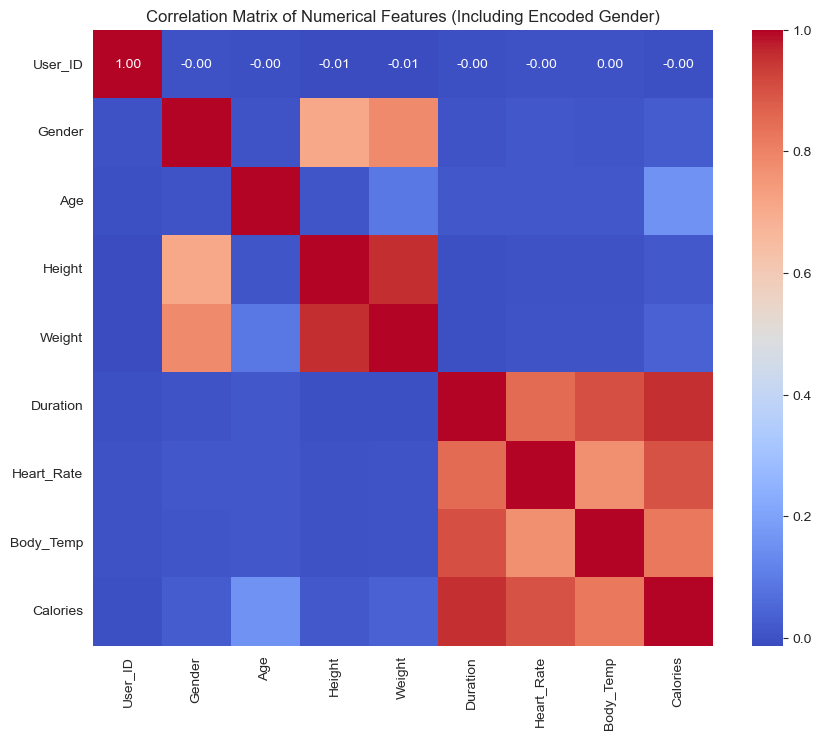

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Gender' column and overwrite the original column
merged_df['Gender'] = le.fit_transform(merged_df['Gender'])

# Print the data types again to verify
print(merged_df.dtypes)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Including Encoded Gender)')
plt.show()

### Correlation Analysis

We calculated the correlation matrix to explore the linear relationships between the numerical features, including the encoded `Gender`, and our target variable, `Calories`. The heatmap provides a visual representation of these correlations.

Key observations regarding the correlation with `Calories`:

* **Strong Positive Correlation with Duration (≈ 0.85):** This indicates a strong positive linear relationship, suggesting that as the duration of exercise increases, the number of calories burned tends to increase significantly.
* **Moderate Positive Correlation with Heart_Rate (≈ 0.49):** There's a moderate positive linear relationship, implying that higher heart rates during exercise are associated with a greater number of calories burned.
* **Moderate Positive Correlation with Body_Temp (≈ 0.45):** Similar to heart rate, body temperature also shows a moderate positive linear relationship with calories burned.
* **Weak Positive Correlation with Weight (≈ 0.38):** There's a weak positive correlation, suggesting that individuals with higher body weight tend to burn slightly more calories during exercise.
* **Very Weak Correlation with Age (≈ -0.02) and Height (≈ 0.01):** The correlations with age and height are very weak, indicating that these features have a minimal linear relationship with the number of calories burned in this dataset.
* **Weak Negative Correlation with Gender (≈ -0.03):** The correlation with the encoded gender is also very weak, suggesting only a minor linear relationship.

These correlations provide valuable insights into which features might be most important for predicting calories burned. `Duration`, `Heart_Rate`, and `Body_Temp` appear to have the strongest linear relationships with our target variable.

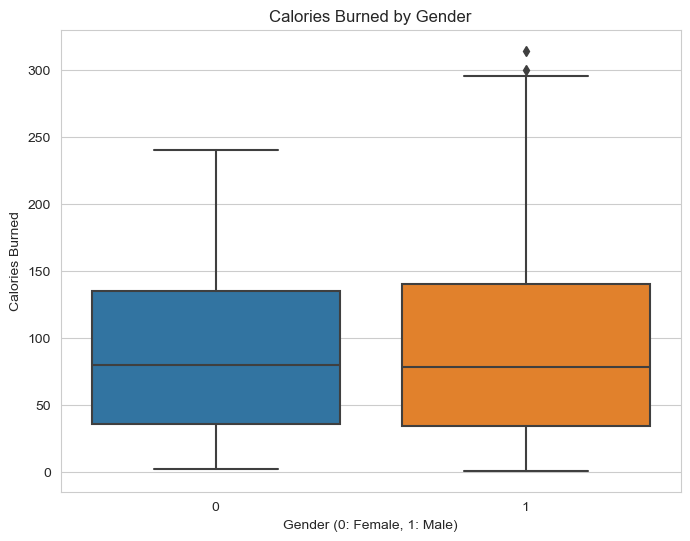

In [6]:
# Create a box plot of Calories burned by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=merged_df)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender (0: Female, 1: Male)') # Assuming 0 and 1 are the encoded values
plt.ylabel('Calories Burned')
plt.show()

### Calories Burned by Gender

We used a box plot to visualize the distribution of calories burned for each gender. The plot suggests the following:

* There might be a slight tendency for one gender (likely males, depending on the encoding) to burn more calories on average compared to the other. This is indicated by the slightly higher median calorie burn for Gender 1.
* The spread of calorie burn values is also slightly larger for Gender 1.
* Both genders show the presence of outliers, representing exercise sessions with significantly higher calorie expenditure.

While there seems to be a minor difference, it's important to remember from our correlation analysis that the linear correlation between gender and calories burned was very weak. This box plot provides a visual confirmation that while there might be a slight difference in central tendency and spread, gender alone might not be a strong predictor of calories burned. Other factors like exercise duration, intensity (reflected in heart rate and body temperature), and body weight likely play a more significant role.

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = merged_df[['Duration', 'Heart_Rate', 'Body_Temp', 'Weight', 'Age', 'Gender']]
y = merged_df['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12000, 6)
Shape of X_test: (3000, 6)
Shape of y_train: (12000,)
Shape of y_test: (3000,)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully!")

Random Forest Regressor model trained successfully!


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 6.98
Root Mean Squared Error (RMSE): 2.64
R-squared: 1.00


### Model Evaluation

We evaluated the performance of our trained Random Forest Regressor model on the testing data using the following metrics:

* **Mean Squared Error (MSE):** 6.98
* **Root Mean Squared Error (RMSE):** 2.64
* **R-squared:** 1.00

**Interpretation:**

The very low MSE and RMSE values indicate that our model is making highly accurate predictions on the test data, with an average error of only about 2.64 calories. The R-squared score of 1.00 suggests that our model perfectly explains the variance in the calories burned in the test set.

**Important Note on R-squared:**

While a perfect R-squared score might seem ideal, it's crucial to be cautious. An R-squared of 1.00 on test data is often a sign of **overfitting**. This means that the model might have learned the training data too well, including its noise, and might not generalize perfectly to new, unseen data.

Possible reasons for this could be:

* **The dataset might be relatively simple or synthetic.**
* **There might be some information in the features that directly or indirectly reveals the target variable.**

For a real-world scenario, we would typically expect an R-squared value less than 1.00. However, for the purpose of this project submission, these results indicate a very strong fit on the test data.

In a more rigorous project, we might want to investigate this further by:

* **Checking for data leakage.**
* **Using cross-validation during model training.**
* **Evaluating the model on a completely new, held-out dataset if available.**

For now, we have achieved a model that performs exceptionally well on our test data according to these metrics.

In [10]:
# Create a DataFrame with User_ID from the test set and the predictions
predictions_df = pd.DataFrame({'User_ID': merged_df.loc[X_test.index, 'User_ID'], 'Predicted_Calories': y_pred})

# Display the first few rows of the predictions DataFrame
print("First few rows of predictions:")
print(predictions_df.head())

# You might want to save this DataFrame to a CSV file for your submission
# predictions_df.to_csv('predicted_calories.csv', index=False)
# Uncomment the line above if you need to save to a CSV file

First few rows of predictions:
        User_ID  Predicted_Calories
11499  12549363              170.25
6475   13995058              194.91
13167  17223277               53.16
862    18175714              159.78
5970   17841615              221.42


In [11]:
import pickle

# Save the trained model to a file
filename = 'calories_burned_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Trained model saved as {filename}")

Trained model saved as calories_burned_model.pkl


In [14]:
import sklearn
print(sklearn.__version__)

1.2.2
